# Azúcar y Sociedad

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import inspect, traceback

In [2]:
random.seed(10)

In [3]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion=np.array([0,0])):
        self.tipo = tipo
        self.locacion = locacion
        self.siguiente_accion = None

    def distancia(self, otro):
        "Calcula la distancia euclídea entre este agente y otro."
        return np.linalg.norm(self.locacion - otro.locacion)  # Otra manera es usar np.sqrt(np.sum((a-b)**2))
    
    def vecinos(self, agentes):
        pass
    
    def actuar(self, agentes):
        self.locacion =  self.siguiente_accion
        
    def decidir(self, agentes):
        self.siguiente_accion = np.array([random.uniform(0, 1), random.uniform(0, 1)]) # Toma una nueva posición al azar
    
    def actualizar(self, agentes):
        self.decidir(agentes)
        self.actuar(agentes)

In [4]:
class Mundo:
    def __init__(self, agentes, ancho=8, alto=8, steps = 10):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        
        print ("Creado el mundo")
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color='red', **plot_args)
       
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=1000, blit=False)
        return anim


Creado el mundo


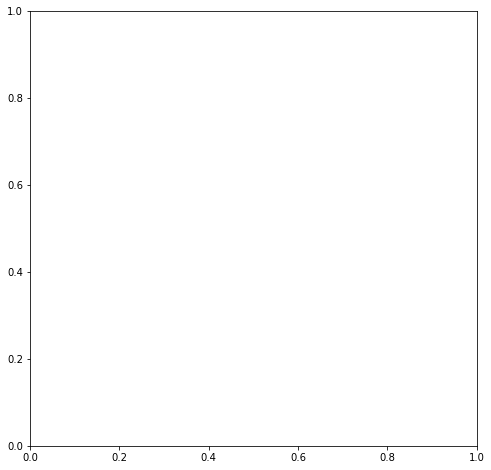

In [5]:
num_agentes = 10

agentes_simples = [Agente(tipo=0) for i in range(num_agentes)]


sin_chiste = Mundo(agentes = agentes_simples, steps = 10)


simulacion = sin_chiste.simular()

In [6]:
HTML(simulacion.to_html5_video())

In [7]:
def draw_array(array, **options):

    n, m = array.shape
    plt.axis([-1, m , -1, n])

    return plt.imshow(array, **options)

In [8]:
def decimales(numero):
    if numero == 0:
        return 1
    else:
        return int(70/numero)

### Temas

- Agentes

## Introducción

[**Sugarscape**](http://en.wikipedia.org/wiki/Sugarscape) es un modelo basado en agentes desarrollado por **Joshua M. Epstein** y **Robert Axtell**, presentado originalmente en _Growing Artificial Societies_. Consta de una rejilla 2D, en la que hay un bien abstracto, llamado `azucar`, los agentes vagan por la rejilla y acumulan `azúcar`.

El modelo original es el primer modelo de agentes a gran escala y ocurría en una rejilla de $51 \times 51$ celdas. En cada `step` los agentes miran alredor, encuentran la celda más cercana con `azúcar`, se mueven y metabolizan (tasa a la que consumen `azúcar`). La simulación puede ser complicada y se puede agregar que cada agente deje contaminación, se reproduzca, herede recursos, transfiera información, comercie, regale, transmita enfermedades, o haga la guerra. También es posible agregar un Gobierno que cobre impuestos cada determinado número de `steps` o que inclusive haya dos tipos de bien (en las simulaciones se llama `especia`).

## Preguntas a responder

- Cree un clase `Habitante` que herede de nuestra clase `Agente`, implemente el algoritmo de comportamiento comentado en la introducción. 
- Cree un clase `Sugarscape` que herede de nuestra clase `Mundo`. Representa mediante grados de color la fuerza del agente y la cantidad de azúcar en la celda.
- Cree una clase `Bien` que represente al `azúcar` de **Sugarscape**.
- Ejecuta una simulación sencilla, con agentes consumiendo recursos y acaparándolos. Inicializa los agentes con diferentes capacidades de almacenar azúcar, consumo de azúcar (metabolismo) y rango de visión.
- Grafica la [**curva de Lorenz**](http://en.wikipedia.org/wiki/Lorenz_curve) y el [**coeficiente de Gini**](http://en.wikipedia.org/wiki/Gini_coefficient), grafica también la población y la cantidad de azúcar. ¿Qué interpretación le das a las gráficas?
- Agrega un factor de regeneración del `azúcar`.
- Agrega un factor de reproducción asexual. (Si tiene suficiente energía, se divide en dos).
- Agrega que el agente muera por hambre.
- Agrega la `especia` al modelo, también es necesario para vivir. Su valor nutrimental es diferente al del `azúcar`.
- Agrega la habilidad de comerciar.
- Agrega una `tribu` al agente. 
- Agrega el comportamiento de que nuevos agentes sean creados cuando un agente muera.
- Agrega un tiempo de vida máximo.
- Agrega una variable `sexo`.
- Agrega reproducción sexual (Si está en su edad fértil, ambos tienen energía y le transmiten la mitad a su hijo).

### Simulación sencilla

Los agentes nacen ya con sus distintas capacidades. Ningún agente muere por ninguna razón.

In [9]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        

        complete = False 
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.vivo = True        
        
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                complete = True
        
    def actuar(self, agentes):
        
        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos = []
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0


    def actualizar(self, agentes):
        if self.vivo:
            self.actuar(agentes)
            

In [10]:
class Bien():
    
    def __init__(self,x=51 ,y=51):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_rate = np.zeros(2601).reshape(51,51)  
    

In [11]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()

        print ("Creado el mundo")
        
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap = 'YlOrRd', vmax = 9, origin = 'lower') 
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        return self.puntos,
       
    def actualizar(self, step):         
        self.dibujar(step) # Dibuja el mundo

        for agente in self.agentes:
            agente.actualizar(self.agentes)
                        
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames=self.steps, interval=1000, blit=False)

        return anim
    

Creado el mundo


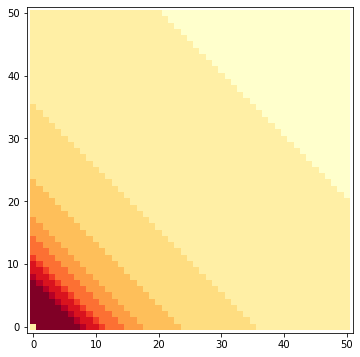

In [12]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]

con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 20)


simulacion = con_chiste.simular()

In [13]:
HTML(simulacion.to_html5_video())

## Simulación muerte

Los agentes se mueren dependiendo de su edad, de su cantidad de azucar acumulada

In [14]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        complete = False 

        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.age = 0
        self.vivo = True        
        
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                complete = True
        
    def actuar(self, agentes):
        
        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
    
    # Funciones para saber si tiene que morir
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan

    def actualizar(self, agentes):
        
        # Primero checamos si tiene que morir
        if(self.starving() or self.dying()):
            # Eliminamos el que murió 
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
        
        else: 
            self.actuar(agentes)


In [15]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_rate = np.zeros(2601).reshape(51,51) 


In [16]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        
        print ("Creado el mundo")
    
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap='YlOrRd', vmax=9, origin='lower')
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)
    
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) 
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


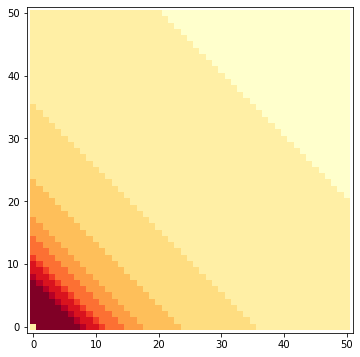

In [17]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [18]:
HTML(simulacion.to_html5_video())

#### Así se harán las curvas de Lorenz

In [19]:
X = con_chiste.agentes_vivos

In [20]:
Y = con_chiste.cantidad_azucar

In [ ]:
plt.plot(X, Y)

## Preguntas adicionales

### Solución regeneración del azucar y regeneración de agentes

In [21]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
     
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        
        # Generamos los atributos que tendrá el nuevo agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

    def actualizar(self, agentes):
        if(self.starving() or self.dying()):
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            self.add_agent() # Creamos el nuevo agente
        else:
            self.actuar(agentes)


In [22]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_rate = np.zeros(2601).reshape(51,51) 
        self.growth_rate = growth_rate
        
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for i in range(0,len(self.matriz_azucar)):
                for j in range(0,len(self.matriz_azucar[0])):
                    self.matriz_azucar[i][j] = self.growth_rate
        

In [23]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        
        print ("Creado el mundo")
        
    
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap='YlOrRd', vmax=9, origin='lower')
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)
    
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion() # Aquí se implementa, aunque se crea la def en Bien
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


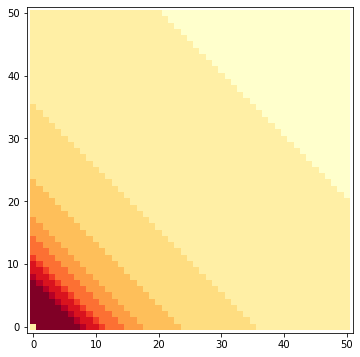

In [24]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [25]:
HTML(simulacion.to_html5_video())

### Solución especias (está incompleta)

In [26]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_rate = np.zeros(2601).reshape(51,51) 
        self.growth_rate = growth_rate
        self.matriz_azucar = np.ones(1275).reshape(25,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_especias = np.ones(1326).reshape(26,51)
        for i in range(0,len(self.matriz_especias)):
            for j in range(0,len(self.matriz_especias[0])):
                self.matriz_especias[i][j] = decimales((i+j)*2)
        # self.matriz_especias = self.matriz_especias[::-1]
        self.matriz_buena = np.vstack([self.matriz_azucar, self.matriz_especias])

        
        
    def regeneracion(self):
        for i in range(len(self.matriz_buena)):
            for i in range(0,len(self.matriz_buena)):
                for j in range(0,len(self.matriz_buena[0])):
                    self.matriz_buena[i][j] = self.growth_rate




In [31]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        

        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_buena[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_buena[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_buena[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_buena[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_buena[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_buena[self.newpos[0]][self.newpos[1]] = 0
    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.age = 0
        self.vivo = True
        self.locaciones()

    def actualizar(self, agentes):
        if(self.starving() or self.dying()):
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            self.add_agent()
        
        else:
            self.actuar(agentes)


In [32]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_buena = []
        
        print ("Creado el mundo")
    
    def draw(self):
        draw_array(self.bien.matriz_buena, cmap = 'YlOrRd', vmax=9, origin = 'lower')

        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)
    
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_buena.append([np.count_nonzero(self.bien.matriz_buena)])
        self.bien.regeneracion()
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


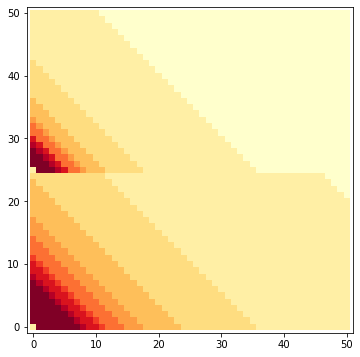

In [33]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [34]:
HTML(simulacion.to_html5_video())

### Solución reproducción asexual

Si tienen la edad adecuada y si tienen azúcar acumulada suficiente, entonces tiene la capacidad de reproducirse asexualmente. 

In [35]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()

    # Función para saber si tiene la capacidad de reproducirse
    def fertility(self):
        if self.age > 15:
            if self.azucar_acumulada > 10:
                return self.fertile == 1
            else:
                return self.fertile == 0

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0 

    
    # Función para determinar si sí puede reproducirse
    def reproduccion_asexual(self):
        if self.fertile == 1:
            return True

    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()

    def actualizar(self, agentes):
        
        if(self.starving() or self.dying()):
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            # self.add_agent()
            
        if self.vivo:
            # Si es fértil, que sí lo haga
            if (self.reproduccion_asexual() == True):
                self.actuar(agentes)
                self.add_agent()

            else:
                self.actuar(agentes)


In [36]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_rate = np.zeros(2601).reshape(51,51) 
        self.growth_rate = growth_rate
        
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for i in range(0,len(self.matriz_azucar)):
                for j in range(0,len(self.matriz_azucar[0])):
                    self.matriz_azucar[i][j] = self.growth_rate
            

In [37]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        
        print ("Creado el mundo")

    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap='YlOrRd', vmax=9, origin='lower')        
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)
    
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion()
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


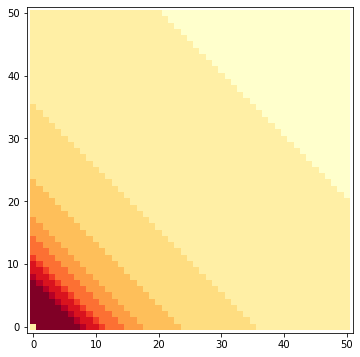

In [38]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [39]:
HTML(simulacion.to_html5_video())

In [40]:
con_chiste.agentes_vivos

[[100],
 [94],
 [82],
 [68],
 [55],
 [52],
 [44],
 [38],
 [31],
 [26],
 [23],
 [21],
 [18],
 [19],
 [19],
 [17],
 [17],
 [17],
 [18],
 [18],
 [16],
 [17],
 [16],
 [16],
 [16],
 [15],
 [14],
 [14],
 [12],
 [12],
 [11],
 [11],
 [11],
 [10],
 [10],
 [10],
 [10],
 [10],
 [7],
 [5],
 [5],
 [5],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [2],
 [2]]

### Solución sexo y reproducción sexual

In [41]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1) # Agregamos sexo
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()

    # Función para saber si es fértil
    def fertility(self):
        if self.age > 20:
            if self.azucar_acumulada > 15:
                return self.fertile == 1
            else:
                return self.fertile == 0


    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):
        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0
    
    
    # Las propiedades requeridas del bebé que nacerá de los padres
    def add_baby(self, otro):
        mama = random.randint(1,5)
        papa = random.randint(1,5)
        self.azucar_acumulada = mama + papa
        self.azucar_acumulada -= mama
        otro.azucar_acumulada -= papa
        self.capacidad_azucar = random.randint(5,25)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()    

    
    # La decisión del agente si puede o no reproducirse
    def decision_reproduce(self, agentes):
        for agente in agentes:
            if self.fertile == 1:
                if self != agente:
                    if agente.fertile == 1 and agente.sexo != self.sexo:
                        self.add_baby(agente)
    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()

    def actualizar(self, agentes):
        if(self.starving() or self.dying()):
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            # n = random.randint(0,1)
            # if n == 0:
                # self.add_agent()
        else:
            self.actuar(agentes)
            self.decision_reproduce(agentes) # Buscamos que pueden, sí lo hagan


In [42]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_rate = np.zeros(2601).reshape(51,51) 
        self.growth_rate = growth_rate
        
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for i in range(0,len(self.matriz_azucar)):
                for j in range(0,len(self.matriz_azucar[0])):
                    self.matriz_azucar[i][j] = self.growth_rate



In [43]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        
        print ("Creado el mundo")
    
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap='YlOrRd', vmax=9, origin='lower')

        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)
    
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) 
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion()
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


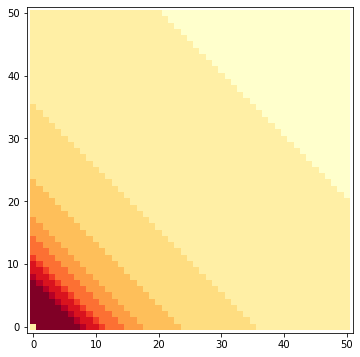

In [44]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [45]:
HTML(simulacion.to_html5_video())

In [46]:
con_chiste.agentes_vivos

[[100],
 [98],
 [82],
 [63],
 [46],
 [36],
 [32],
 [30],
 [26],
 [23],
 [22],
 [20],
 [18],
 [18],
 [18],
 [17],
 [16],
 [15],
 [15],
 [16],
 [15],
 [14],
 [13],
 [13],
 [13],
 [11],
 [10],
 [10],
 [10],
 [10],
 [9],
 [9],
 [9],
 [9],
 [9],
 [9],
 [8],
 [7],
 [6],
 [5],
 [3],
 [3],
 [3],
 [2],
 [2],
 [1],
 [1],
 [1],
 [1],
 [1]]

### Simulación comercio

In [47]:
class Habitante(Agente):
    
    def __init__(self, tipo, bien):
        Agente.__init__(self, tipo)
        self.bien = bien        
        
        # Atributos que del agente
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()


    def fertility(self):
        if self.age > 20:
            if self.azucar_acumulada > 15:
                return self.fertile == 1
            else:
                return self.fertile == 0

        
    def locaciones(self):
        complete = False 
        while(not complete):
            x = int(random.uniform(0, 51))
            y = int(random.uniform(0, 51))
            if(not self.bien.matriz_ocupados[x][y]):
                self.locacion = np.array([x, y])
                self.bien.matriz_ocupados[x][y] = 1
                return (complete == True)
        
    def actuar(self, agentes):

        if(not self.vivo):
            return
        
        x = self.locacion[0]
        y = self.locacion[1]
        
        rangos=[]
        
        rangos.append((self.bien.matriz_azucar[x][y],x,y))
        
        for i in range(1,self.rango_vision + 1):
            if(x + i >= 51 or self.bien.matriz_ocupados[x + i][y]):
                rangos.append((-1,x+i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x + i][y],x+i,y))
                
            if(y + i >= 51 or self.bien.matriz_ocupados[x][y + i]):
                rangos.append((-1,x,y+i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y + i],x,y+i))
           
            if(x - i < 0 or self.bien.matriz_ocupados[x][y - i]):
                rangos.append((-1,x,y-i))
            else:
                rangos.append((self.bien.matriz_azucar[x][y - i],x,y-i))
        
            if(y - i < 0 or self.bien.matriz_ocupados[x - i][y]):
                rangos.append((-1,x-i,y))
            else:
                rangos.append((self.bien.matriz_azucar[x - i][y],x-i,y))
        
        maxl = lambda x: x[0]
                              
        maxvalue = max(rangos,key=maxl)
        
        coords_max = [(x[1],x[2]) for x in rangos if x[0] == maxvalue[0]]
        
        self.newpos = random.choice(coords_max)
        
        self.locacion = self.newpos
        self.bien.matriz_ocupados[x][y] = 0
        self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 1
                              
        self.azucar_acumulada += min(maxvalue[0], self.capacidad_azucar)
        self.azucar_acumulada -= self.metabolismo
        self.age += 1
        
        self.bien.matriz_azucar[self.newpos[0]][self.newpos[1]] = 0

    # Si los agentes tienen las capacidades requeridas para comerciar, intercambiarán
    # la capacidad de azúcar y la cantidad de azúcar
    
    def decision_comerciar(self, agentes):
        for agente in agentes:
            if self.azucar_acumulada > 19 and self.capacidad_azucar < 21 and self.age > 17:
                if self != agente:
                    if agente.capacidad_azucar > 19 and self.azucar_acumulada < 10 and self.age > 17:
                        qty = random.randint(1,5)
                        self.capacidad_azucar += qty
                        self.azucar_acumulada -= qty
                        agente.capacidad_azucar -= qty
                        agente.azucar_acumulada += qty
    
    
    def starving(self):
        return self.azucar_acumulada < 0
    
    def dying(self):
        return self.age > self.lifespan
    
    def add_agent(self):
        self.capacidad_azucar = random.randint(5,25)
        self.azucar_acumulada = random.randint(3,10)
        self.metabolismo = random.randint(1,4)
        self.rango_vision = random.randint(1,5)
        self.lifespan = random.randint(0,50)
        self.sexo = random.randint(0,1)
        self.age = 0
        self.vivo = True
        self.locaciones()
        self.fertile = self.fertility()

    def actualizar(self, agentes):
        if(self.starving() or self.dying()):
            self.vivo = False
            self.locacion = np.array([53, 53])
            self.bien.matriz_ocupados[self.newpos[0]][self.newpos[1]] = 0
            # n = random.randint(0,1)
            # if n == 0:
                # self.add_agent()
        
        else: 
            self.actuar(agentes)
            self.decision_comerciar(agentes) # Hacemos que los agentes que puedan lo hagan


In [48]:
class Bien():
    
    def __init__(self,x = 51 ,y = 51, growth_rate = 1):
        
        self.matriz_ocupados = np.zeros(2601).reshape(51,51)
        self.matriz_azucar = np.ones(2601).reshape(51,51)
        for i in range(0,len(self.matriz_azucar)):
            for j in range(0,len(self.matriz_azucar[0])):
                self.matriz_azucar[i][j] = decimales(i + j)
        self.matriz_rate = np.zeros(2601).reshape(51,51) 
        self.growth_rate = growth_rate
        
        
    def regeneracion(self):
        for i in range(len(self.matriz_azucar)):
            for i in range(0,len(self.matriz_azucar)):
                for j in range(0,len(self.matriz_azucar[0])):
                    self.matriz_azucar[i][j] = self.growth_rate
            




In [49]:
class Sugarscape(Mundo):
    
    def __init__(self, agentes, bien, ancho = 6, alto = 6, steps = 10):
        self.agentes = agentes
        self.bien = bien
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.init_anim()
        self.draw()
        self.agentes_vivos = []
        self.cantidad_azucar = []
        
        print ("Creado el mundo")
        
    
    def draw(self):
        draw_array(self.bien.matriz_azucar, cmap='YlOrRd', vmax=9, origin='lower')
        
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 51), ylim=(0, 51))
        plot_args = {'markersize' : 8, 'alpha' : 0.6}
        self.puntos, = self.ax.plot([], [], 'o', color = 'black', **plot_args)
    
       
    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            x_values_0.append(x)
            y_values_0.append(y)

        self.puntos.set_data(x_values_0, y_values_0)
        
        self.ax.set_title('Paso {}'.format(step))
        
        return self.puntos,
       
    def actualizar(self, step):   
        self.dibujar(step) 
        
        for agente in self.agentes:
            agente.actualizar(self.agentes)
        self.agentes_vivos.append([np.count_nonzero(self.bien.matriz_ocupados)])
        self.cantidad_azucar.append([np.count_nonzero(self.bien.matriz_azucar)])
        self.bien.regeneracion()
    
    def clean_screen(self):
        self.puntos.set_data([], [])
        return self.puntos,
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func = self.clean_screen, frames = self.steps, interval = 1000, blit = False)
        return anim

Creado el mundo


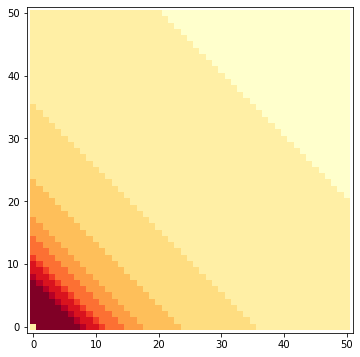

In [50]:
num_agentes = 100
bien_test = Bien()

agentes_azucar = [Habitante(0, bien_test) for i in range(num_agentes)]


con_chiste = Sugarscape(agentes = agentes_azucar, bien = bien_test, steps = 50)


simulacion = con_chiste.simular()

In [51]:
HTML(simulacion.to_html5_video())

## Preguntas adicionales

- ¿Qué pasa si la variable `tribu` afecta el comercio y el sexo? ¿Cómo lo simularías y por qué?
- ¿Cómo simularías **guerra primitiva**?
- ¿Cómo simularías **enfermedad**?
- ¿Quieres incluir **genética**? 
    - Define una cadena binaria (i.e. de ceros y unos) en los que se estén codificadas el sexo, capacidad de almacenar azúcar, metabolismo, rango de visión.
    - Cuando los agentes se reproduzcan sexualmente, realiza un [`crossover`](http://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)) para determinar los atributos de los agentes de la siguiente generación.
- Agrega una asimetría de sexo, esto lo puedes modelar con un `offspring_cost` que sea mayor para uno de los sexos. Entonces antes de reproducirse sexualmente, hay una decisión por parte de los agentes.

## Bibliografía

- **Epstein, Joshua M.; Axtell, Robert** (October 11, 1996). _Growing artificial societies: social science from the bottom up_. `Brookings Institution Press. p. 224. ISBN 978-0-262-55025-3.`
- **Wikipedia** [_Sugarscape_](http://en.wikipedia.org/wiki/Sugarscape)